<a href="https://colab.research.google.com/github/Akintoyeai/Customer_Segmentation/blob/main/Customer_Segmentation_Classification_using_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Customer Segmentation Classification using KMeans**

Install Kaggle dependencies

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download kaushiksuresh147/customer-segmentation
!unzip customer-segmentation.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
customer-segmentation.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  customer-segmentation.zip
replace Test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Test.csv                
replace Train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Train.csv               


# New Section

In [ ]:
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from plotly.offline import init_notebook_mode,iplot

In [ ]:
# Training Data
df = pd.read_csv('Train.csv')

In [ ]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
df.shape

(8068, 11)

In [ ]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [ ]:
df.shape

(6665, 11)

In [ ]:
df.Profession.value_counts()

Artist           2192
Healthcare       1077
Entertainment     809
Doctor            592
Engineer          582
Executive         505
Lawyer            500
Marketing         233
Homemaker         175
Name: Profession, dtype: int64

In [ ]:
des_counts = df["Segmentation"].value_counts()
print(des_counts)

D    1757
C    1720
A    1616
B    1572
Name: Segmentation, dtype: int64


In [ ]:
Profession_dummies = pd.get_dummies(df.Profession, prefix='Profession')
Gender_dummies = pd.get_dummies(df.Gender, prefix='Gender')
Var_1_dummies = pd.get_dummies(df.Var_1, prefix='Var_1')
df = pd.concat([df, Profession_dummies], axis=1)
df = pd.get_dummies(df, columns=['Profession','Gender','Var_1'])

In [ ]:
df.head()

,ID,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Gender_Female,Gender_Male,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,No,22,No,1.0,Low,4.0,D,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,466315,Yes,67,Yes,1.0,Low,1.0,B,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,461735,Yes,67,Yes,0.0,High,2.0,B,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
5,461319,Yes,56,No,0.0,Average,2.0,C,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6,460156,No,32,Yes,1.0,Low,3.0,C,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
mk = LabelEncoder()
df['Ever_Married'] = mk.fit_transform(df['Ever_Married'])
df['Graduated'] = mk.fit_transform(df['Graduated'])


In [ ]:
df.head()

,ID,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Gender_Female,Gender_Male,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,0,22,0,1.0,Low,4.0,D,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,466315,1,67,1,1.0,Low,1.0,B,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,461735,1,67,1,0.0,High,2.0,B,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
5,461319,1,56,0,0.0,Average,2.0,C,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6,460156,0,32,1,1.0,Low,3.0,C,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
temp = df.describe()
temp

,ID,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Gender_Female,Gender_Male,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
count,6665.00000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000
mean,463519.84096,0.591748,43.536084,0.637509,2.629107,2.841110,0.328882,0.088822,0.087322,0.121380,0.075769,0.161590,0.026257,0.075019,0.034959,0.328882,0.088822,0.087322,0.121380,0.075769,0.161590,0.026257,0.075019,0.034959,0.448312,0.551688,0.015604,0.054314,0.095124,0.127382,0.011103,0.671568,0.024906
std,2566.43174,0.491547,16.524054,0.480755,3.405365,1.524743,0.469842,0.284508,0.282327,0.326593,0.264648,0.368102,0.159909,0.263441,0.183689,0.469842,0.284508,0.282327,0.326593,0.264648,0.368102,0.159909,0.263441,0.183689,0.497358,0.497358,0.123946,0.226652,0.293408,0.333425,0.104791,0.469678,0.155851
min,458982.00000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,461349.00000,0.000000,31.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,463575.00000,1.000000,41.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,465741.00000,1.000000,53.000000,1.000000,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,467974.00000,1.000000,89.000000,1.000000,14.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# fig2 = px.histogram(df,x='Gender',color='Gender',template='plotly_dark')
# fig2.show()

In [ ]:
# age_plot = px.histogram(df,x='Age',color='Age',template='plotly_dark')
# age_plot.show()

In [ ]:
# mar_plot = px.histogram(df,x='Ever_Married',color='Ever_Married',template='plotly_light')
# mar_plot.show()

In [ ]:
# grad_plot = px.histogram(df,x='Graduated',color='Graduated',template='plotly_dark')
# grad_plot.show()

In [ ]:
# prof_plot = px.histogram(df,x='Profession',color='Profession',template='plotly_dark')
# prof_plot.show()

In [ ]:
# WE_plot = px.histogram(df,x='Work_Experience',color='Work_Experience',template='plotly_dark')
# WE_plot.show()

In [ ]:
# SS_plot = px.histogram(df,x='Spending_Score',color='Spending_Score',template='plotly_dark')
# SS_plot.show()

In [ ]:
# FS_plot = px.histogram(df,x='Family_Size',color='Family_Size',template='plotly_dark')
# FS_plot.show()

In [ ]:
# Var_plot = px.histogram(df,x='Var_1',color='Var_1',template='plotly_dark')
# Var_plot.show()

In [ ]:
Spending_Score_dict = {'Low':0 , 'Average':1, 'High':2}
df['Ordinal_SS']=df.Spending_Score.map(Spending_Score_dict)
df[['Ordinal_SS']]
df = df.drop(columns=["Spending_Score"]) 


In [ ]:
df = df.drop(columns=["ID","Segmentation"]) 

In [ ]:
df.head()

,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Gender_Female,Gender_Male,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Ordinal_SS
0,0,22,0,1.0,4.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
2,1,67,1,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,1,67,1,0.0,2.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,2
5,1,56,0,0.0,2.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
6,0,32,1,1.0,3.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
df = df.drop(columns=[]) 

Text(0, 0.5, 'Family_Size')

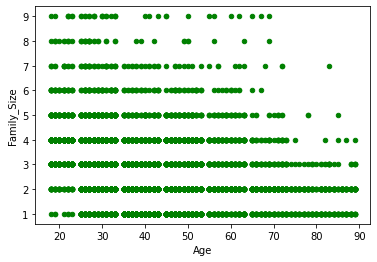

In [ ]:
df.plot(kind='scatter', x='Age',y='Family_Size',alpha=1, color='green')
plt.xlabel('Age')
plt.ylabel('Family_Size')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df[['Age','Family_Size']] = mms.fit_transform(df[['Age','Family_Size']])



Text(0, 0.5, 'Family_Size')

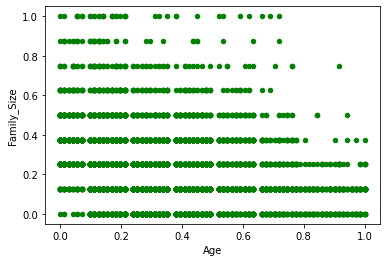

In [ ]:
df.plot(kind='scatter', x='Age',y='Family_Size',alpha=1, color='green')
plt.xlabel('Age')
plt.ylabel('Family_Size')

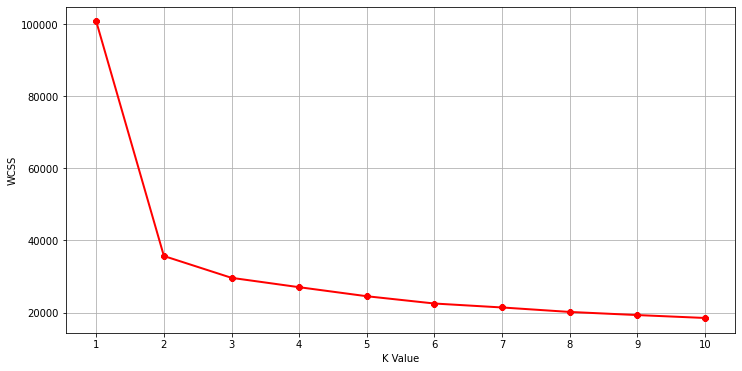

In [ ]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
y_predicted = kmeans.fit_predict(df)
y_predicted

array([3, 3, 0, ..., 3, 3, 0], dtype=int32)

In [ ]:
df['cluster'] = y_predicted

In [ ]:
des_counts = df["cluster"].value_counts()
print(des_counts)

3    2389
0    2190
1    1252
2     834
Name: cluster, dtype: int64


In [ ]:
df

,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Gender_Female,Gender_Male,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Ordinal_SS,cluster
0,0,0.056338,0,1.0,0.375,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,3
2,1,0.690141,1,1.0,0.000,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,3
3,1,0.690141,1,0.0,0.125,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,2,0
5,1,0.535211,0,0.0,0.125,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
6,0,0.197183,1,1.0,0.250,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,1,0.323944,1,0.0,0.500,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,2,0
8064,0,0.239437,0,3.0,0.375,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2
8065,0,0.211268,1,1.0,0.000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,3
8066,0,0.126761,1,1.0,0.375,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,3
